In [2]:
import pandas as pd

### Read SQL file

In [3]:
fd = open("C:\\Users\\drago\\Desktop\\DAITA10\\Project Work\\dataset\\dataset\\adv.sql", "r")
sqlFile = fd.read()
fd.close()

In [4]:
sqlLines = sqlFile.splitlines()
print(sqlLines)

['/*', '-- Query: SELECT * FROM daita02adv.adv_plus', 'LIMIT 0, 50000', '', '-- Date: 2023-03-28 17:54', '*/', "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (1,230.1,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (2,44.5,'Yes');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (3,17.2,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (4,151.5,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (5,180.8,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (6,8.7,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (7,57.5,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (8,120.2,'Yes');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (9,8.6,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (10,199.8,'Yes');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (11,66.1,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (12,214.7,'No');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUES (13,23.8,'Yes');", "INSERT INTO `` (`adv_ID`,`TV`,`Actor`) VALUE

In [49]:
sqlDictList = []
for line in sqlLines[6:]:
    id, tv, actor = line[47:-2].split(",")
    actor = actor.replace("\'", "")
    temp = {"adv_ID": id, "TV": tv, "Actor": actor}
    sqlDictList.append(temp)

In [50]:
df = pd.DataFrame.from_dict(sqlDictList)
df['adv_ID'] =df['adv_ID'].astype(int)
df.set_index('adv_ID', inplace=True)
df

,TV,Actor
adv_ID,,
1,230.1,No
2,44.5,Yes
3,17.2,No
4,151.5,No
5,180.8,No
...,...,...
196,38.2,No
197,94.2,No
198,177,No


In [51]:
df['adv_ID'] =df['adv_ID'].astype(int)

KeyError: 'adv_ID'

### Read xls file

In [29]:
xls = pd.read_excel("C:\\Users\\drago\\Desktop\\DAITA10\\Project Work\\dataset\\dataset\\adv_sales.xls", "Sheet1", index_col=0)
xls.set_index('adv_ID', inplace=True)
xls

,Sales
adv_ID,
1,22.1
2,10.4
3,12.0
4,16.5
5,17.9
...,...
196,7.6
197,14.0
198,14.8


### Read CSV file

In [38]:
csv = pd.read_csv("C:\\Users\\drago\\Desktop\\DAITA10\\Project Work\\dataset\\dataset\\data_adv.csv", index_col=0)
csv.set_index('adv_ID', inplace=True)
csv

,Radio,Newspaper,Actress
adv_ID,,,
1,37.8,69.2,No
2,39.3,45.1,Yes
3,45.9,69.3,No
4,41.3,58.5,No
5,10.8,58.4,No
...,...,...,...
196,3.7,13.8,No
197,4.9,8.1,No
198,9.3,6.4,No


### Read Markdown file

In [39]:
social = pd.read_csv("C:\\Users\\drago\\Desktop\\DAITA10\\Project Work\\dataset\\dataset\\social.csv", index_col=0)
social

,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato
adv_ID,,,,,
1,218595,9503000,3978000,6409000,2210000
2,42275,4472000,1872000,3016000,1040000
3,16340,5160000,2160000,3480000,1200000
4,143925,7095000,2970000,4785000,1650000
5,171760,7697000,3222000,5191000,1790000
...,...,...,...,...,...
196,35526,3268000,1368000,2204000,760000
197,87606,6020000,2520000,4060000,1400000
198,164610,6364000,2664000,4292000,1480000


## THE GREAT MERGING
### Merging social and csv

In [41]:
appoggio1 = pd.merge(csv, social, on="adv_ID")
appoggio1

,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato
adv_ID,,,,,,,,
1,37.8,69.2,No,218595,9503000,3978000,6409000,2210000
2,39.3,45.1,Yes,42275,4472000,1872000,3016000,1040000
3,45.9,69.3,No,16340,5160000,2160000,3480000,1200000
4,41.3,58.5,No,143925,7095000,2970000,4785000,1650000
5,10.8,58.4,No,171760,7697000,3222000,5191000,1790000
...,...,...,...,...,...,...,...,...
196,3.7,13.8,No,35526,3268000,1368000,2204000,760000
197,4.9,8.1,No,87606,6020000,2520000,4060000,1400000
198,9.3,6.4,No,164610,6364000,2664000,4292000,1480000


### Merging the previous step with xls

In [42]:
appoggio2 = pd.merge(appoggio1, xls, left_on="adv_ID", right_on="adv_ID")
appoggio2

,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales
adv_ID,,,,,,,,,
1,37.8,69.2,No,218595,9503000,3978000,6409000,2210000,22.1
2,39.3,45.1,Yes,42275,4472000,1872000,3016000,1040000,10.4
3,45.9,69.3,No,16340,5160000,2160000,3480000,1200000,12.0
4,41.3,58.5,No,143925,7095000,2970000,4785000,1650000,16.5
5,10.8,58.4,No,171760,7697000,3222000,5191000,1790000,17.9
...,...,...,...,...,...,...,...,...,...
196,3.7,13.8,No,35526,3268000,1368000,2204000,760000,7.6
197,4.9,8.1,No,87606,6020000,2520000,4060000,1400000,14.0
198,9.3,6.4,No,164610,6364000,2664000,4292000,1480000,14.8


### Merging the previous step with df

In [53]:
result = pd.merge(appoggio2, df, on="adv_ID")

In [54]:
result

,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales,TV,Actor
adv_ID,,,,,,,,,,,
1,37.8,69.2,No,218595,9503000,3978000,6409000,2210000,22.1,230.1,No
2,39.3,45.1,Yes,42275,4472000,1872000,3016000,1040000,10.4,44.5,Yes
3,45.9,69.3,No,16340,5160000,2160000,3480000,1200000,12.0,17.2,No
4,41.3,58.5,No,143925,7095000,2970000,4785000,1650000,16.5,151.5,No
5,10.8,58.4,No,171760,7697000,3222000,5191000,1790000,17.9,180.8,No
...,...,...,...,...,...,...,...,...,...,...,...
196,3.7,13.8,No,35526,3268000,1368000,2204000,760000,7.6,38.2,No
197,4.9,8.1,No,87606,6020000,2520000,4060000,1400000,14.0,94.2,No
198,9.3,6.4,No,164610,6364000,2664000,4292000,1480000,14.8,177,No


## OUTPUT

In [56]:
result.to_csv("C:\\Users\\drago\\Desktop\\DAITA10\\Project Work\\dataset\\dataset\\result.csv", sep=',', encoding='utf-8')

## Random stuff tbh

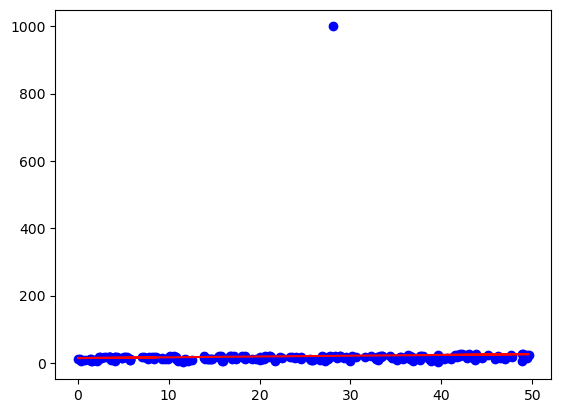

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
X = result[["Radio"]]
y = result["Sales"]
model = LinearRegression().fit(X,y)
y_s = model.predict(X)
plt.scatter(X, y, color='blue')
plt.plot(X, y_s, color='red')
plt.show()